In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('/content/multiple_linear_regression_dataset.csv')
df

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830
5,51,7,41630
6,28,5,41340
7,33,4,37650
8,37,5,40250
9,39,8,45150


In [3]:
df.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


In [4]:
df.tail()

,age,experience,income
15,41,6,38900
16,58,17,63600
17,23,1,30870
18,44,9,44190
19,37,10,48700


In [5]:
df.isna().sum()

age           0
experience    0
income        0
dtype: int64

In [6]:
df.dtypes

age           int64
experience    int64
income        int64
dtype: object

In [7]:
x=df.iloc[:,:-1]
x

,age,experience
0,25,1
1,30,3
2,47,2
3,32,5
4,43,10
5,51,7
6,28,5
7,33,4
8,37,5
9,39,8


In [8]:
y=df.iloc[:,-1]
y

0     30450
1     35670
2     31580
3     40130
4     47830
5     41630
6     41340
7     37650
8     40250
9     45150
10    27840
11    46110
12    36720
13    34800
14    51300
15    38900
16    63600
17    30870
18    44190
19    48700
Name: income, dtype: int64

<Axes: xlabel='age', ylabel='income'>

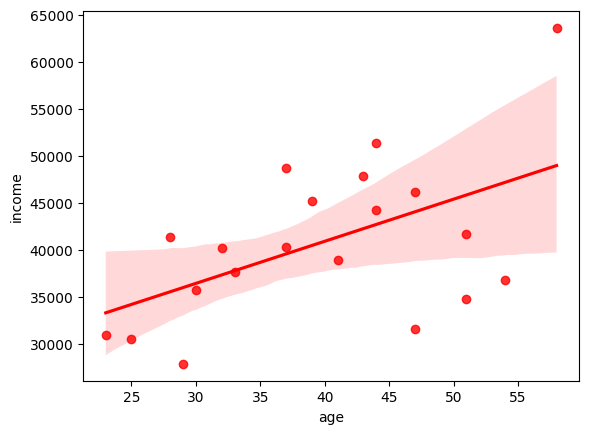

In [9]:
import seaborn as sns
sns.regplot(x=df['age'],y=y,color='r')

<Axes: xlabel='experience', ylabel='income'>

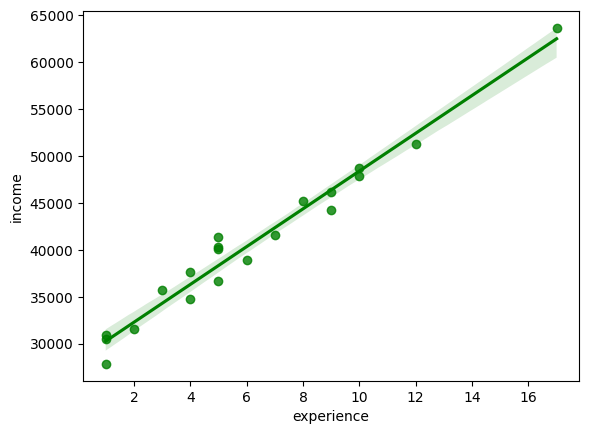

In [10]:
sns.regplot(x=df['experience'],y=y,color='g')

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)
x_train

,age,experience
5,51,7
8,37,5
4,43,10
14,44,12
0,25,1
15,41,6
2,47,2
12,54,5
11,47,9
9,39,8


In [12]:
x_test

,age,experience
19,37,10
1,30,3
13,51,4
17,23,1
10,29,1
16,58,17


In [13]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([48754.60990452, 35715.60472252, 35058.44958463, 32620.14221149,
       31864.18116232, 60029.7059718 ])

In [14]:
print(model.predict([[23,0]]))

[30631.43367729]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [15]:
df1=pd.DataFrame({'Actual value':y_test,'Predicted value':y_pred,'Difference':y_test-y_pred})
df1

,Actual value,Predicted value,Difference
19,48700,48754.609905,-54.609905
1,35670,35715.604723,-45.604723
13,34800,35058.449585,-258.449585
17,30870,32620.142211,-1750.142211
10,27840,31864.181162,-4024.181162
16,63600,60029.705972,3570.294028


In [17]:
print('slope is:')
list(zip(x,model.coef_))

slope is:


[('age', -125.99350819454966), ('experience', 1988.7085341948944)]

In [18]:
print('Constant is:',model.intercept_)

Constant is: 33529.28436576927


In [20]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,mean_squared_error, r2_score
print('MAE is:', mean_absolute_error(y_test,y_pred))
print('MAPE is:', mean_absolute_percentage_error(y_test,y_pred))
MSE=mean_squared_error(y_test,y_pred)
print('MSE is :',MSE)
print('RMSE is:',np.sqrt(MSE))
print('R2_Score is:',r2_score(y_test,y_pred))

MAE is: 1617.2136022795523
MAPE is: 0.04453399466143388
MSE is : 5345981.57593641
RMSE is: 2312.1378799579425
R2_Score is: 0.9647244926876221
